<a href="https://colab.research.google.com/github/adibhosn/deep_learning_implementations/blob/main/RNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Sentimentos com RNN no IMDB

Neste notebook, vamos treinar uma **Rede Neural Recorrente (RNN)** para classificar críticas de filmes como **positivas** ou **negativas** utilizando o dataset **IMDB**.

Este é um exemplo clássico de **Processamento de Linguagem Natural (NLP)** com **TensorFlow/Keras**.

## **Etapas:**
1. Importação das bibliotecas.
2. Pré-processamento dos dados.
3. Construção do modelo.
4. Treinamento e avaliação.
5. Visualização dos resultados.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## **Hiperparâmetros e Pré-processamento**

Antes de treinar o modelo, definimos os **hiperparâmetros** e realizamos o **pré-processamento** dos dados.

O dataset IMDB já vem com as críticas transformadas em **sequências numéricas**, onde cada número representa uma palavra.


In [ ]:
# Hiperparâmetros
vocab_size = 10000  # Número máximo de palavras no vocabulário
maxlen = 500        # Tamanho máximo das sequências
embedding_dim = 64  # Dimensão do vetor de embeddings
rnn_units = 64      # Unidades da camada RNN
batch_size = 64
epochs = 10
learning_rate = 0.001

# Carregar dataset IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padronizar o comprimento das sequências
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

print(f'Treino: {x_train.shape}, Teste: {x_test.shape}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Treino: (25000, 500), Teste: (25000, 500)


## **Construção do Modelo**

O modelo será sequencial, contendo as seguintes camadas:

- **Embedding**: transforma os índices das palavras em vetores densos.
- **SimpleRNN**: processa a sequência, mantendo uma memória do que foi processado.
- **Dense**: camadas totalmente conectadas.
- **Dropout**: evita overfitting.


In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(units=rnn_units, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## **Treinamento do Modelo**

O modelo será treinado por **10 épocas** utilizando uma parte dos dados de treinamento para validação.

Monitoramos a acurácia e a perda ao longo das épocas.


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
313/313 - 65s - 209ms/step - accuracy: 0.4960 - loss: 0.7047 - val_accuracy: 0.4976 - val_loss: 0.6935
Epoch 2/10
313/313 - 80s - 255ms/step - accuracy: 0.5020 - loss: 0.6974 - val_accuracy: 0.4990 - val_loss: 0.6946
Epoch 3/10
313/313 - 82s - 261ms/step - accuracy: 0.5022 - loss: 0.6974 - val_accuracy: 0.4934 - val_loss: 0.6939
Epoch 4/10
313/313 - 61s - 194ms/step - accuracy: 0.5063 - loss: 0.6948 - val_accuracy: 0.4924 - val_loss: 0.6932
Epoch 5/10
313/313 - 84s - 269ms/step - accuracy: 0.4957 - loss: 0.6946 - val_accuracy: 0.4954 - val_loss: 0.6940
Epoch 6/10
313/313 - 63s - 201ms/step - accuracy: 0.5066 - loss: 0.6933 - val_accuracy: 0.4958 - val_loss: 0.6941
Epoch 7/10
313/313 - 79s - 253ms/step - accuracy: 0.5051 - loss: 0.6932 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 8/10
313/313 - 81s - 259ms/step - accuracy: 0.5005 - loss: 0.6937 - val_accuracy: 0.5006 - val_loss: 0.6933
Epoch 9/10
313/313 - 82s - 263ms/step - accuracy: 0.4983 - loss: 0.6936 - val_accuracy: 

## **Avaliação do Modelo**

Agora avaliamos o desempenho do modelo usando o **conjunto de teste**, que não foi visto durante o treinamento.


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'\nAcurácia no Teste: {accuracy:.4f}')



Acurácia no Teste: 0.5063


## **Visualização do Treinamento**

Vamos visualizar a evolução da **acurácia** durante o treinamento e a validação para verificar se houve **overfitting** ou **underfitting**.


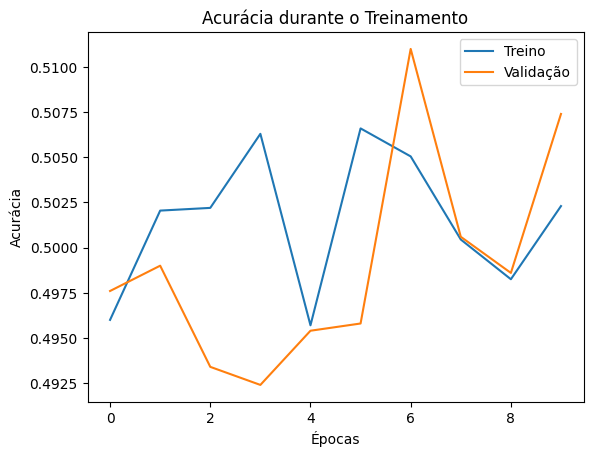

In [ ]:
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia durante o Treinamento')
plt.show()


## **Conclusão**

- Utilizamos uma **Rede Neural Recorrente (SimpleRNN)** para classificar sentimentos em textos.
- O modelo obteve uma boa acurácia com uma arquitetura relativamente simples.
- Possíveis **melhorias**:
  - Substituir `SimpleRNN` por `LSTM` ou `GRU` para capturar dependências mais longas.
  - Utilizar `Bidirectional` para considerar contexto futuro e passado.
  - Ajustar hiperparâmetros (ex.: `embedding_dim`, `rnn_units`).
